# CLASSIFICATION OF POTENTIAL REVENUE

Objectives

The general objective of this study is to identify what type of information can be extracted from public data;
And as a specific objective, to extract information on the classification of presumed revenue according to the profile of individuals.

In [514]:
# imports 

import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [490]:
!python --version

Python 3.11.7


In [522]:
print ('pandas: ',pd.__version__)
print ('sklearn: ', sklearn.__version__)
print ('numpy: ', np.__version__)
print ('matplotlib: ', matplotlib.__version__)
print ('xgboosting: ', xgb.__version__)



pandas:  2.2.2
sklearn:  1.2.2
numpy:  1.26.4
matplotlib:  3.8.0
xgboosting:  2.0.3


## THE DATABASE

NOTES ABOUT THE DATABASE

The datasets used come from the MEC website and are available at: https://dadosabertos.mec.gov.br/sisu

This notebook does not aim to demonstrate the data cleaning, attribute engineering or EDA process. For this purpose, there is another notebook in "lexquadros/machine_learning/public_data/classification/notebook_EDA_public_data".

The datasets are originally in ".csv" format, however, due to their volume and size, they were processed in PySpark and converted to ".parquet".

### DATASETS

ListagemChamadaRegular_2017-1.parquet

ListagemChamadaRegular_2017-2.parquet

ListagemListaEspera_2017-1.parquet

ListagemChamadaRegular_2018-2.parquet

ListagemChamadaRegular_2019-1e2.parquet

ListagemListaEspera_2019-1.parquet

ListagemChamadaRegular_2020-1.parquet

ListagemChamadaRegular_2020-2.parquet

ListagemListaEspera_2020-1.parquet

ListagemListaEspera_2020-2.parquet

ListagemChamadaRegular_2021-1.parquet

ListagemListaEspera_2021-1.parquet

ListagemChamadaRegular_2022.parquet

### SELECTED FEATURES

The features were processed, labeled and selected. To see all the features of the original datasets, see: dicionario_dados.pdf

Features that reflected the sociodemographic identity of the individuals were selected:

'NU_ANO' - year of the selection process

'SG_UF_IES' - State of the IES in string

'SG_UF_CAMPUS' - State of the IES campus in string format

'NO_MUNUCIPIO_CAMPUS' - name of the municipality of the IES campus in string format

'NO_CURSO' - name of the course applied for, string format

'TP_MOD_CONCORRENCIA' - type of competition modality, string format

'DS_MOD_CONCORRENCIA' - type of competition, string format

'NU_CPF' - incomplete CPF number, string format

'NO_INSCRITO' - name of the applicant, in string format

'TP_SEXO' - sex, string format

'DT_NASCIMENTO' - date of birth, datetime format YYYY/mm/dd

'SG_UF_CANDIDATO' - State of origin of the candidate, format string

'MUNICIPIO_CANDIDATO' - candidate's municipality of origin, string format

'ST_APROVADO' - approval status, string format

### THE RESULTANT DATASET

The datasets were concatenated and then cleaned to look for duplicates, null values and operating errors.

The final result was a single dataset with 16,255,527 entries and 14 columns, in ".parquet" format ('notebook_concact_all_files_sisu_17_22.parquet').

### Attention

The dataset is very large to store in GitHub, and so, the is the link to file stored in Google Drive: https://drive.google.com/file/d/1PlN0sUNoday5cOqgc6poInCOVC-ll6Z-/view?usp=sharing



In [7]:
# new dataset

df = pd.read_parquet ('notebook_concact_all_files_sisu_17_22.parquet')

df.head()

,NU_ANO,SG_UF_IES,SG_UF_CAMPUS,NO_MUNICIPIO_CAMPUS,NO_CURSO,TP_MOD_CONCORRENCIA,DS_MOD_CONCORRENCIA,NU_CPF,NO_INSCRITO,TP_SEXO,DT_NASCIMENTO,SG_UF_CANDIDATO,MUNICIPIO_CANDIDATO,ST_APROVADO
0,2020,RJ,RJ,Rio de Janeiro,ENGENHARIA DE PRODUÇÃO,A,Ampla concorrência,XXX.031188-XX,JOAO VITOR MUNIZ DE SOUZA,M,1998-07-18,RJ,rio de janeiro,S
1,2020,RJ,RJ,Rio de Janeiro,ENGENHARIA DE PRODUÇÃO,A,Ampla concorrência,XXX.302555-XX,ALEXANDRE FERMINO ALVARES FILHO,M,2001-04-13,RJ,rio de janeiro,S
2,2020,RJ,RJ,Rio de Janeiro,ENGENHARIA DE PRODUÇÃO,A,Ampla concorrência,XXX.198284-XX,KAROLYNE MARIA GOMES OLIVEIRA,F,2000-02-08,RJ,rio de janeiro,S
3,2020,RJ,RJ,Rio de Janeiro,ENGENHARIA DE PRODUÇÃO,L,Candidatos com renda familiar bruta per capita...,XXX.904786-XX,SAMANTHA ARAUJO BRITTO,F,2001-09-30,RJ,rio de janeiro,S
4,2020,RJ,RJ,Rio de Janeiro,ENGENHARIA DE PRODUÇÃO,A,Ampla concorrência,XXX.137215-XX,CHRISTIAN FERREIRA GONCALVES,M,2001-10-11,RJ,rio de janeiro,S


In [8]:
df.shape

(16255527, 14)

## GDP PER CAPITA OF BRAZILIAN MUNICIPALITIES

This database can be found at: https://www.ibge.gov.br/estatisticas/economicas/contas-nacionais/9088-produto-interno-bruto-dos-municipios.html

I used the database of GDP per capita by municipality of 2021 (5570 municipalities) to add socioeconomic information to the SISU database.

I proceeded with the cleaning, engineering and extraction of features of interest. To learn about the steps, see the notebook in "notebook_EDA_public_data".

The result was the dataset 'notebook_pib_pc_clean_municipio_2020.csv'. Since it is a small dataset, it was kept in the '.csv' format.

In [10]:
pib = pd.read_csv ('notebook_pib_pc_clean_municipio_2020.csv')
pib.columns

Index(['ano', 'uf', 'municipio', 'pib_pc'], dtype='object')

In [11]:
pib.head()

,ano,uf,municipio,pib_pc
0,2020,RO,alta floresta d'oeste,"25.091,18"
1,2020,RO,ariquemes,"25.730,20"
2,2020,RO,cabixi,"32.226,25"
3,2020,RO,cacoal,"29.331,29"
4,2020,RO,cerejeiras,"37.069,25"


In [12]:
pib.shape

(5570, 4)

## SALARY BASE

The salary base, which will be used as a possible income variable, was collected from the website that conducts research on occupational salaries: https://www.salario.com.br/tabela-salarial/

The occupations are from the Brazilian Occupation Catalog (CBO), which contains a description of each occupation, as well as the necessary training. Salary data from 2022 and 2023 were collected.

To learn how the occupation grouping process was carried out, see the notebook: notebook_EDA_public_data

In [14]:
sal = pd.read_csv ('base_salarial_22_23.csv')
sal.head()

,cbo,cargo,carga_horaria,piso_22,media_22,mediana_22,teto_22,hora_22,piso_23,media_23,mediana_23,teto_23,hora_23
0,231310,professor de artes do ensino fundamental,28,3032,3117,2400,7178,22,"3.143,89","3.232,16","2.536,00","7.531,20","23,12"
1,262705,Músico Interprete Cantor,40,2401,2468,2100,5129,12,"2.362,16","2.428,49","2.046,00","5.113,78","12,35"
2,262615,Músico Regente,33,2494,2564,2200,5359,15,"2.547,18","2.618,70","2.200,00","5.511,91","16,09"
3,226305,Musicoterapeuta,30,2903,2985,2757,5744,19,"2.864,90","2.945,34","2.700,00","5.705,96","19,79"
4,262620,Musicólogo,33,2189,2251,2000,4366,13,"2.164,78","2.225,56","2.000,00","4.277,71","13,21"


In [15]:
sal.shape

(128, 13)

## CBO AND TRAINING

Higher Education Institutions (HEI) courses train (or will train) individuals with profiles for certain occupations. In this sense, the more than 700 different courses were grouped into 128.

The grouping took into account the course title (e.g. "Tourism Technologist") and the corresponding course in the CBO ("Tourism Specialist").

Some courses have titles that do not correspond to any item in the CBO (e.g. "Scenography and Costume Design"). In these cases, the course is investigated to define the area of concentration; in the example, the corresponding item would be "Theatre Production Technologist".

To learn more about the grouping of courses, see: notebook_EDA_public_data

## FINAL DATASET

The final result is a dataset with 15,051,226 entries and 30 columns. All the cleaning process was performed in the previous processes, resulting in a dataset ready for modeling.

In [7]:
# dataset final

df_all = pd.read_parquet ('sisu_2017_2022+ocupacoes+pibpc_brasil+media_salarial_22_23.parquet')
df_all.head(3)

,cbo,ocupacoes,carga_horaria,piso_22,media_22,mediana_22,teto_22,hora_22,piso_23,media_23,...,cpf,nome,sexo,nascimento,uf_cand,municipio_cand,aprovado,ano_pib,uf_pib,pib_pc
0,231310,professor de artes do ensino fundamental,28,3032,3117,2400,7178,22,3143.0,"3.232,16",...,XXX.291427-XX,DENIVAL SOUZA DOS SANTOS,M,1998-06-15,RJ,rio de janeiro,S,2020,RJ,"49.094,40"
1,231310,professor de artes do ensino fundamental,28,3032,3117,2400,7178,22,3143.0,"3.232,16",...,XXX.663947-XX,JUAN MARCOS PEREIRA MARTINS,M,2000-11-23,RJ,rio de janeiro,S,2020,RJ,"49.094,40"
2,231310,professor de artes do ensino fundamental,28,3032,3117,2400,7178,22,3143.0,"3.232,16",...,XXX.193027-XX,EDMILSON CARLOS DA SILVA JUNIOR,M,1990-10-25,RJ,rio de janeiro,S,2020,RJ,"49.094,40"


In [43]:
df_all.shape

(15051226, 30)

In [38]:
df_all.isnull().sum()

cbo                    0
ocupacoes              0
carga_horaria          0
piso_22                0
media_22               0
mediana_22             0
teto_22                0
hora_22                0
piso_23                0
media_23               0
mediana_23             0
teto_23                0
hora_23                0
ano_concorr            0
SG_UF_IES              0
SG_UF_CAMPUS           0
NO_MUNICIPIO_CAMPUS    0
curso                  0
tipo_concorr           0
modo_concorr           0
cpf                    0
nome                   0
sexo                   0
nascimento             0
uf_cand                0
municipio_cand         0
aprovado               0
ano_pib                0
uf_pib                 0
pib_pc                 0
dtype: int64

In [22]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15051500 entries, 0 to 15051499
Data columns (total 30 columns):
 #   Column               Dtype         
---  ------               -----         
 0   cbo                  int64         
 1   ocupacoes            object        
 2   carga_horaria        int64         
 3   piso_22              int64         
 4   media_22             int64         
 5   mediana_22           int64         
 6   teto_22              int64         
 7   hora_22              int64         
 8   piso_23              float64       
 9   media_23             object        
 10  mediana_23           object        
 11  teto_23              object        
 12  hora_23              object        
 13  ano_concorr          int64         
 14  SG_UF_IES            object        
 15  SG_UF_CAMPUS         object        
 16  NO_MUNICIPIO_CAMPUS  object        
 17  curso                object        
 18  tipo_concorr         object        
 19  modo_concorr       

### A SMALLER DATASET

The full dataset, with over 15 million entries, proved computationally expensive to cluster, so I chose to reduce the sample by 5%.

In [ ]:
# smaller dataset

# only the approved candidates were selected
df_all = df_all.query ('aprovado == "S"')


# the sample with 5% of dataset
df_sample = df_all.sample (frac=0.05, random_state=42)



# MACHINE LEARNING

## CLUSTER

To create a classification model, I decided to cluster the final dataset using K-means and K-modes, for continuous and categorical data, respectively.

K-prototypes requires Python 3.10 to work properly. Therefore, the cluster analysis was done in a separate notebook (lexquadros/machine_learning/cluster/k_prototypes)



### ELBOW CURVE

The elbow curve technique shows what the best number of clusters would be. The curves are slightly different, but converge around 6 clusters. See more in lexquadros/machine_learning/cluster/k-prototypes

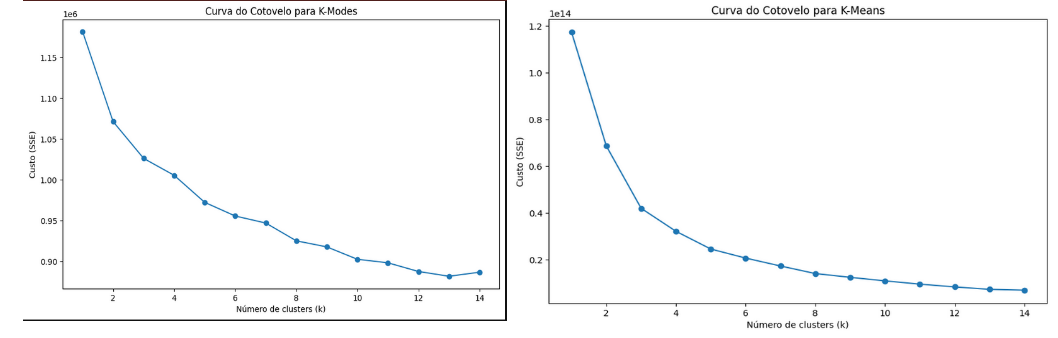

In [7]:
from IPython.display import Image, display
display(Image(filename ='elbow_curve_.png'))

### K-prototypes with Pyspark

the dataset with 5% of the data, df_sample, was clustered by K-Prototypes seeking to organize the database into the 6 clusters suggested for the algorithm. The result was df_cluster.

In [289]:
df_cluster.head()

,ocupacoes,curso,tipo_concorr,modo_concorr,ano_concorr,sexo,uf_cand,ano_pib,municipio_cand,aprovado,...,teto_22,hora_22,piso_23,media_23,mediana_23,teto_23,hora_23,pib_pc,index,cluster
0,professor no ensino médio,ciências biológicas,A,Ampla concorrência,2019,F,RJ,2020,macaé,S,...,10223,33,4104.0,4219.37,2839.0,10738.65,33.91,58618.72,3060400,0
1,tecnólogo em gastronomia,gastronomia,L,Candidatos com renda familiar bruta per capita...,2019,F,PE,2020,recife,S,...,5702,12,2546.0,2618.30,2000.0,5781.67,12.57,30427.69,500617,4
2,professor no ensino médio,ciências biológicas,L,"Candidatos autodeclarados pretos, pardos ou in...",2018,M,DF,2020,brasília,S,...,10223,33,4104.0,4219.37,2839.0,10738.65,33.91,87016.16,3956052,0
3,professor no ensino médio,interdisciplinar em ciência e tecnologia,A,Ampla concorrência,2021,M,SP,2020,são paulo,S,...,10223,33,4104.0,4219.37,2839.0,10738.65,33.91,60750.09,5620334,1
4,odontologista,odontologia,A,Ampla concorrência,2021,F,MG,2020,uberaba,S,...,9511,28,4590.0,4719.58,4006.0,9756.84,29.37,50997.49,9115563,5


In [291]:
df_cluster.cluster.unique()

array([0, 4, 1, 5, 3, 2], dtype=uint16)

In [428]:
df_cluster.cluster.value_counts()

cluster
0    41181
5    31600
1    29423
4    20054
3    19811
2    18589
Name: count, dtype: int64

In [14]:
# All 'float' types conver to 'int'

df_cluster ['cluster'] = df_cluster.cluster.astype (int)
df_cluster ['piso_23'] = df_cluster.piso_23.astype (int)
df_cluster ['media_23'] = df_cluster.media_23.astype (int)
df_cluster ['mediana_23'] = df_cluster.mediana_23.astype (int)
df_cluster ['teto_23'] = df_cluster.teto_23.astype (int)
df_cluster ['hora_23'] = df_cluster.hora_23.astype (int)
df_cluster ['pib_pc'] = df_cluster.pib_pc.astype (int)



df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160658 entries, 0 to 160657
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ocupacoes       160658 non-null  object
 1   curso           160658 non-null  object
 2   tipo_concorr    160658 non-null  object
 3   modo_concorr    160658 non-null  object
 4   ano_concorr     160658 non-null  int64 
 5   sexo            160658 non-null  object
 6   uf_cand         160658 non-null  object
 7   ano_pib         160658 non-null  int64 
 8   municipio_cand  160658 non-null  object
 9   aprovado        160658 non-null  object
 10  uf_pib          160658 non-null  object
 11  idade           160658 non-null  int64 
 12  carga_horaria   160658 non-null  int64 
 13  piso_22         160658 non-null  int64 
 14  media_22        160658 non-null  int64 
 15  mediana_22      160658 non-null  int64 
 16  teto_22         160658 non-null  int64 
 17  hora_22         160658 non-nu

### PRE PROCESSING TO MACHINE LEARNING

In [6]:
df_cluster.isnull().sum()

ocupacoes         0
curso             0
tipo_concorr      0
modo_concorr      0
ano_concorr       0
sexo              0
uf_cand           0
ano_pib           0
municipio_cand    0
aprovado          0
uf_pib            0
idade             0
carga_horaria     0
piso_22           0
media_22          0
mediana_22        0
teto_22           0
hora_22           0
piso_23           0
media_23          0
mediana_23        0
teto_23           0
hora_23           0
pib_pc            0
index             0
cluster           0
dtype: int64

In [431]:
df_cluster.head(2)

,ocupacoes,curso,tipo_concorr,modo_concorr,ano_concorr,sexo,uf_cand,ano_pib,municipio_cand,aprovado,...,teto_22,hora_22,piso_23,media_23,mediana_23,teto_23,hora_23,pib_pc,index,cluster
0,professor no ensino médio,ciências biológicas,A,Ampla concorrência,2019,F,RJ,2020,macaé,S,...,10223,33,4104.0,4219.37,2839.0,10738.65,33.91,58618.72,3060400,0
1,tecnólogo em gastronomia,gastronomia,L,Candidatos com renda familiar bruta per capita...,2019,F,PE,2020,recife,S,...,5702,12,2546.0,2618.30,2000.0,5781.67,12.57,30427.69,500617,4


In [18]:
# a sample to validation

df_validation = df_cluster.iloc[-16000:]
df_train = df_cluster.iloc[:-16000]

print ('test', df_validation.shape)
print ('train', df_train.shape)

test (16000, 26)
train (144658, 26)


### ORDINAL ENCODER

In [20]:
# ordinal encoder
from sklearn.preprocessing import OrdinalEncoder


def convert_object_to_ordinal(df):
    object_cols = df.select_dtypes(include=['object']).columns
    encoder = OrdinalEncoder()
    df[object_cols] = encoder.fit_transform(df[object_cols]).astype(int)
    
    return df



df_train = convert_object_to_ordinal(df_train)
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144658 entries, 0 to 144657
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   ocupacoes       144658 non-null  int64
 1   curso           144658 non-null  int64
 2   tipo_concorr    144658 non-null  int64
 3   modo_concorr    144658 non-null  int64
 4   ano_concorr     144658 non-null  int64
 5   sexo            144658 non-null  int64
 6   uf_cand         144658 non-null  int64
 7   ano_pib         144658 non-null  int64
 8   municipio_cand  144658 non-null  int64
 9   aprovado        144658 non-null  int64
 10  uf_pib          144658 non-null  int64
 11  idade           144658 non-null  int64
 12  carga_horaria   144658 non-null  int64
 13  piso_22         144658 non-null  int64
 14  media_22        144658 non-null  int64
 15  mediana_22      144658 non-null  int64
 16  teto_22         144658 non-null  int64
 17  hora_22         144658 non-null  int64
 18  piso

/tmp/ipykernel_15203/1546496080.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[object_cols] = encoder.fit_transform(df[object_cols]).astype(int)


In [12]:
df_train.head()

,ocupacoes,curso,tipo_concorr,modo_concorr,ano_concorr,sexo,uf_cand,ano_pib,municipio_cand,aprovado,...,teto_22,hora_22,piso_23,media_23,mediana_23,teto_23,hora_23,pib_pc,index,cluster
0,76,118,0,21,2019,0,18,2020,2362,0,...,10223,33,4104,4219,2839,10738,33,58618,3060400,9
1,85,358,2,175,2019,0,15,2020,3403,0,...,5702,12,2546,2618,2000,5781,12,30427,500617,5
2,76,118,2,157,2018,1,6,2020,588,0,...,10223,33,4104,4219,2839,10738,33,87016,3956052,12
3,76,409,0,21,2021,1,25,2020,4156,0,...,10223,33,4104,4219,2839,10738,33,60750,5620334,1
4,67,561,0,21,2021,0,10,2020,4420,0,...,9511,28,4590,4719,4006,9756,29,50997,9115563,6


### STANDARD SCALER

In [22]:
to_transform = df_train.drop (columns = ['index','cluster'], axis = 1)

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(to_transform)
df_scaled = pd.DataFrame(df_scaled, columns=to_transform.columns)
df_scaled ['cluster'] = df_train.cluster
df_scaled ['index'] = df_train.index
df_scaled.set_index ('index', inplace = True)
df_scaled.head()

,ocupacoes,curso,tipo_concorr,modo_concorr,ano_concorr,sexo,uf_cand,ano_pib,municipio_cand,aprovado,...,mediana_22,teto_22,hora_22,piso_23,media_23,mediana_23,teto_23,hora_23,pib_pc,cluster
index,,,,,,,,,,,,,,,,,,,,,
0,0.730769,0.186709,0.000000,0.058011,0.4,0.0,0.692308,0.0,0.511366,0.0,...,0.096313,0.263913,0.409836,0.273944,0.206284,0.116729,0.277085,0.403226,0.090909,0
1,0.817308,0.566456,0.666667,0.483425,0.4,0.0,0.576923,0.0,0.736740,0.0,...,0.037251,0.096289,0.065574,0.150519,0.071429,0.034361,0.098962,0.064516,0.042779,4
2,0.730769,0.186709,0.666667,0.433702,0.2,1.0,0.230769,0.0,0.127300,0.0,...,0.096313,0.263913,0.409836,0.273944,0.206284,0.116729,0.277085,0.403226,0.139392,0
3,0.730769,0.647152,0.000000,0.058011,0.8,1.0,0.961538,0.0,0.899762,0.0,...,0.096313,0.263913,0.409836,0.273944,0.206284,0.116729,0.277085,0.403226,0.094549,1
4,0.644231,0.887658,0.000000,0.058011,0.8,0.0,0.384615,0.0,0.956917,0.0,...,0.230264,0.237514,0.327869,0.312446,0.248400,0.231298,0.241798,0.338710,0.077898,5


## MACHINE LEARNING: CLASSIFICATION

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import xgboost as xgb
from sklearn.utils.class_weight import compute_class_weight

X = df_scaled.drop(columns=['cluster'])
y = df_scaled['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# training
model_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
model_rf.fit(X_train, y_train)

model_dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
model_dt.fit(X_train, y_train)

model_et = ExtraTreesClassifier(random_state=42, class_weight='balanced')
model_et.fit(X_train, y_train)

model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, scale_pos_weight=class_weights[1])
model_xgb.fit(X_train, y_train)

# Predict
models = {
    'Random Forest': model_rf,
    'Decision Tree': model_dt,
    'Extra Trees': model_et,
    'XGBoost': model_xgb
}

# Dic to store metrics
metrics = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    
    # Print metrics
    print(f"Modelo: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-" * 60)
    
metrics = pd.DataFrame (metrics)


/home/lex/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [18:10:53] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Modelo: Random Forest
Accuracy: 0.9518
Precision: 0.9539
Recall: 0.9518
F1 Score: 0.9512
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     10973
           1       0.94      0.80      0.87      7926
           2       0.98      0.99      0.98      5065
           3       1.00      0.98      0.99      5452
           4       1.00      1.00      1.00      5559
           5       0.99      0.99      0.99      8423

    accuracy                           0.95     43398
   macro avg       0.96      0.96      0.96     43398
weighted avg       0.95      0.95      0.95     43398

------------------------------------------------------------
Modelo: Decision Tree
Accuracy: 0.9333
Precision: 0.9333
Recall: 0.9333
F1 Score: 0.9333
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     10973
           1       0.83      0.84      0.83      7926
         

In [30]:
metrics = pd.DataFrame (metrics)
metrics

,Random Forest,Decision Tree,Extra Trees,XGBoost
Accuracy,0.951841,0.933338,0.948200,0.953293
Precision,0.953872,0.933298,0.949251,0.955769
Recall,0.951841,0.933338,0.948200,0.953293
F1 Score,0.951162,0.933315,0.947619,0.952563


## MODEL VALIDATION

#### PRE PROCESSING

In [32]:
df_validation.head(3)

,ocupacoes,curso,tipo_concorr,modo_concorr,ano_concorr,sexo,uf_cand,ano_pib,municipio_cand,aprovado,...,teto_22,hora_22,piso_23,media_23,mediana_23,teto_23,hora_23,pib_pc,index,cluster
144658,professor no ensino médio,matemática,A,Ampla concorrência,2021,M,PE,2020,cachoeirinha,S,...,10223,33,4104,4219,2839,10738,33,42964,3166725,0
144659,professor no ensino médio,abi - ciências sociais,L,"Candidatos autodeclarados pretos, pardos ou in...",2019,F,SP,2020,guarulhos,S,...,10223,33,4104,4219,2839,10738,33,47301,3293431,0
144660,professor de ensino fundamental nas quatro pri...,pedagogia - educação do campo,A,Ampla concorrência,2018,M,SP,2020,são vicente,S,...,6420,19,2721,2798,2304,6034,18,11052,6656848,1


In [38]:
# ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

df_ordinal = df_validation.copy()

def convert_object_to_ordinal(df):
    object_cols = df.select_dtypes(include=['object']).columns
    encoder = OrdinalEncoder()
    df[object_cols] = encoder.fit_transform(df[object_cols]).astype(int)
    
    return df



df_ordinal = convert_object_to_ordinal(df_ordinal)
df_ordinal.set_index ('index', inplace = True)
df_ordinal.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 3166725 to 2360349
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ocupacoes       16000 non-null  int64
 1   curso           16000 non-null  int64
 2   tipo_concorr    16000 non-null  int64
 3   modo_concorr    16000 non-null  int64
 4   ano_concorr     16000 non-null  int64
 5   sexo            16000 non-null  int64
 6   uf_cand         16000 non-null  int64
 7   ano_pib         16000 non-null  int64
 8   municipio_cand  16000 non-null  int64
 9   aprovado        16000 non-null  int64
 10  uf_pib          16000 non-null  int64
 11  idade           16000 non-null  int64
 12  carga_horaria   16000 non-null  int64
 13  piso_22         16000 non-null  int64
 14  media_22        16000 non-null  int64
 15  mediana_22      16000 non-null  int64
 16  teto_22         16000 non-null  int64
 17  hora_22         16000 non-null  int64
 18  piso_23         16000 n

In [334]:
df_ordinal.head()

,ocupacoes,curso,tipo_concorr,modo_concorr,ano_concorr,sexo,uf_cand,ano_pib,municipio_cand,aprovado,...,mediana_22,teto_22,hora_22,piso_23,media_23,mediana_23,teto_23,hora_23,pib_pc,cluster
index,,,,,,,,,,,,,,,,,,,,,
3166725,72,391,0,12,2021,1,15,2020,357,0,...,2612,10223,33,4104,4219,2839,10738,33,42964,0
3293431,72,7,2,109,2019,0,25,2020,877,0,...,2612,10223,33,4104,4219,2839,10738,33,47301,0
6656848,70,416,0,12,2018,1,25,2020,2227,0,...,2187,6420,19,2721,2798,2304,6034,18,11052,1
8666540,74,429,2,109,2020,0,25,2020,472,0,...,2805,6228,18,3063,3149,2837,6244,18,15437,5
2987698,72,391,2,108,2019,1,13,2020,251,0,...,2612,10223,33,4104,4219,2839,10738,33,11535,0


### 

In [40]:
from sklearn.preprocessing import MinMaxScaler


# removing the feature 'cluster'
to_transform = df_ordinal.drop(columns=['cluster'], axis=1)

# Apply StandardScaler
scaler = MinMaxScaler()
df_transformed = scaler.fit_transform(to_transform)

# Preseve the original index
df_transformed = pd.DataFrame(df_transformed, columns=to_transform.columns, index=to_transform.index)

# Cancat the feature 'cluster' 
df_transformed_scaled = pd.concat([df_transformed, df_ordinal['cluster']], axis=1)

# df shape
df_transformed_scaled.shape


(16000, 25)

In [42]:
df_transformed_scaled.head(3)

,ocupacoes,curso,tipo_concorr,modo_concorr,ano_concorr,sexo,uf_cand,ano_pib,municipio_cand,aprovado,...,mediana_22,teto_22,hora_22,piso_23,media_23,mediana_23,teto_23,hora_23,pib_pc,cluster
index,,,,,,,,,,,,,,,,,,,,,
3166725,0.727273,0.833689,0.000000,0.048,0.8,1.0,0.576923,0.0,0.145833,0.0,...,0.096313,0.263913,0.409836,0.206287,0.206284,0.116729,0.277085,0.403226,0.063887,0
3293431,0.727273,0.014925,0.666667,0.436,0.4,0.0,0.961538,0.0,0.358252,0.0,...,0.096313,0.263913,0.409836,0.206287,0.206284,0.116729,0.277085,0.403226,0.071294,0
6656848,0.707071,0.886994,0.000000,0.048,0.2,1.0,0.961538,0.0,0.909722,0.0,...,0.055298,0.122910,0.180328,0.086516,0.086590,0.064206,0.108053,0.161290,0.009388,1


In [44]:
df_transformed_scaled_to_predict = df_transformed_scaled.drop(columns=['cluster'], axis=1)

pred = model_xgb.predict(df_transformed_scaled_to_predict)

df_transformed_scaled_to_predict['cluster_pred'] = pred



In [46]:
df_transformed_scaled_to_predict.head()

,ocupacoes,curso,tipo_concorr,modo_concorr,ano_concorr,sexo,uf_cand,ano_pib,municipio_cand,aprovado,...,teto_22,hora_22,piso_23,media_23,mediana_23,teto_23,hora_23,pib_pc,cluster_pred,cluster
index,,,,,,,,,,,,,,,,,,,,,
3166725,0.727273,0.833689,0.000000,0.048,0.8,1.0,0.576923,0.0,0.145833,0.0,...,0.263913,0.409836,0.206287,0.206284,0.116729,0.277085,0.403226,0.063887,0,0
3293431,0.727273,0.014925,0.666667,0.436,0.4,0.0,0.961538,0.0,0.358252,0.0,...,0.263913,0.409836,0.206287,0.206284,0.116729,0.277085,0.403226,0.071294,1,0
6656848,0.707071,0.886994,0.000000,0.048,0.2,1.0,0.961538,0.0,0.909722,0.0,...,0.122910,0.180328,0.086516,0.086590,0.064206,0.108053,0.161290,0.009388,1,1
8666540,0.747475,0.914712,0.666667,0.436,0.6,0.0,0.961538,0.0,0.192810,0.0,...,0.115791,0.163934,0.116134,0.116156,0.116532,0.115599,0.161290,0.016877,5,5
2987698,0.727273,0.833689,0.666667,0.432,0.4,1.0,0.500000,0.0,0.102533,0.0,...,0.263913,0.409836,0.206287,0.206284,0.116729,0.277085,0.403226,0.010213,1,0


### VALIDATION: XGBoosting

In [48]:
# Empty dataframe to storage the models data
validation_metrics = pd.DataFrame ()

validation_metrics ['metrics'] = ['accuracy','precision','recall','f1']


In [50]:
df_transformed_scaled_to_predict = df_transformed_scaled.drop(columns=['cluster'], axis=1)

pred = model_xgb.predict(df_transformed_scaled_to_predict)

df_transformed_scaled_to_predict['cluster_pred'] = pred

if df_transformed_scaled_to_predict.index.equals(df_transformed_scaled.index):
    df_transformed_scaled_to_predict['cluster'] = df_transformed_scaled['cluster']
else:
    raise ValueError("Os índices não estão alinhados! Verifique o alinhamento antes de adicionar a coluna 'cluster'.")




y_true = df_transformed_scaled_to_predict['cluster']
y_pred = df_transformed_scaled_to_predict['cluster_pred']

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print ('XGBoosting Model')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

validation_metrics ['XGB'] = [accuracy,precision,recall,f1]



classification_rep = classification_report(y_true, y_pred)
print('\nClassification Report:\n', classification_rep)


XGBoosting Model
Accuracy: 0.7987
Precision: 0.8860
Recall: 0.7987
F1 Score: 0.7847

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.32      0.49      4139
           1       0.49      0.96      0.65      2929
           2       0.97      0.99      0.98      1808
           3       0.95      0.92      0.93      2014
           4       1.00      1.00      1.00      2008
           5       0.96      0.97      0.96      3102

    accuracy                           0.80     16000
   macro avg       0.89      0.86      0.83     16000
weighted avg       0.89      0.80      0.78     16000



### VALIDATION: Random Forest

In [52]:
df_transformed_scaled_to_predict = df_transformed_scaled.drop(columns=['cluster'], axis=1)

pred = model_rf.predict(df_transformed_scaled_to_predict)

df_transformed_scaled_to_predict['cluster_pred'] = pred




y_true = df_transformed_scaled_to_predict['cluster']
y_pred = df_transformed_scaled_to_predict['cluster_pred']

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print ('Random Forest Model')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

validation_metrics ['Random_Forest'] = [accuracy,precision,recall,f1]


classification_rep = classification_report(y_true, y_pred)
print('\nClassification Report:\n', classification_rep)


Random Forest Model
Accuracy: 0.9453
Precision: 0.9484
Recall: 0.9453
F1 Score: 0.9437

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      4139
           1       0.96      0.75      0.84      2929
           2       0.98      0.99      0.99      1808
           3       1.00      0.98      0.99      2014
           4       1.00      1.00      1.00      2008
           5       0.97      1.00      0.98      3102

    accuracy                           0.95     16000
   macro avg       0.96      0.95      0.95     16000
weighted avg       0.95      0.95      0.94     16000



### VALIDATION: Extra Trees

In [54]:
df_transformed_scaled_to_predict = df_transformed_scaled.drop(columns=['cluster'], axis=1)

pred = model_et.predict(df_transformed_scaled_to_predict)

df_transformed_scaled_to_predict['cluster_pred'] = pred



y_true = df_transformed_scaled_to_predict['cluster']
y_pred = df_transformed_scaled_to_predict['cluster_pred']

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print ('ExtraTrees Model')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


validation_metrics ['Extra_Tress'] = [accuracy,precision,recall,f1]


classification_rep = classification_report(y_true, y_pred)
print('\nClassification Report:\n', classification_rep)


ExtraTrees Model
Accuracy: 0.9420
Precision: 0.9428
Recall: 0.9420
F1 Score: 0.9410

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      4139
           1       0.91      0.78      0.84      2929
           2       0.98      0.99      0.98      1808
           3       0.99      0.98      0.99      2014
           4       1.00      1.00      1.00      2008
           5       0.97      0.99      0.98      3102

    accuracy                           0.94     16000
   macro avg       0.96      0.95      0.95     16000
weighted avg       0.94      0.94      0.94     16000



### Avaliação Decision Trees

In [56]:
df_transformed_scaled_to_predict = df_transformed_scaled.drop(columns=['cluster'], axis=1)

pred = model_et.predict(df_transformed_scaled_to_predict)

df_transformed_scaled_to_predict['cluster_pred'] = pred

y_true = df_transformed_scaled_to_predict['cluster']
y_pred = df_transformed_scaled_to_predict['cluster_pred']

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print ('Decision Trees Model')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


validation_metrics ['Decision_Trees'] = [accuracy,precision,recall,f1]


classification_rep = classification_report(y_true, y_pred)
print('\nClassification Report:\n', classification_rep)


Decision Trees Model
Accuracy: 0.9420
Precision: 0.9428
Recall: 0.9420
F1 Score: 0.9410

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      4139
           1       0.91      0.78      0.84      2929
           2       0.98      0.99      0.98      1808
           3       0.99      0.98      0.99      2014
           4       1.00      1.00      1.00      2008
           5       0.97      0.99      0.98      3102

    accuracy                           0.94     16000
   macro avg       0.96      0.95      0.95     16000
weighted avg       0.94      0.94      0.94     16000



### Compare the metrics

In [70]:
validation_metrics

,metrics,XGB,Random_Forest,Extra_Tress,Decision_Trees
0,accuracy,0.798687,0.945312,0.942000,0.942000
1,precision,0.886009,0.948427,0.942779,0.942779
2,recall,0.798687,0.945312,0.942000,0.942000
3,f1,0.784674,0.943673,0.940952,0.940952


### PLOTING THE LEARNING CURVE

In [60]:
df_metrics_plot = df_transformed_scaled_to_predict.drop(columns=['cluster', 'cluster_pred'], axis=1)

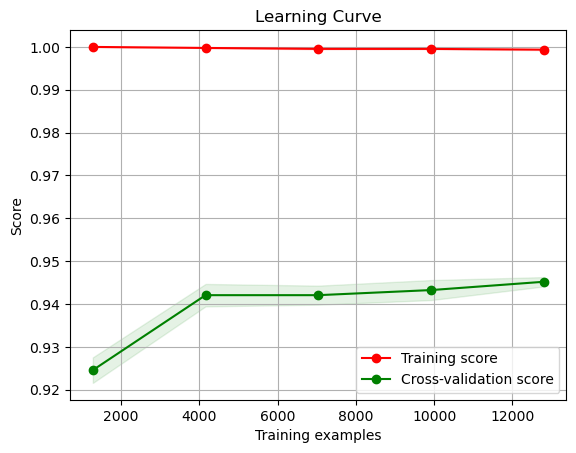

-------------

----> AUC: 0.99
-------------


In [62]:
# XGBoosting

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, train_sizes=None):
    if train_sizes is None:
        train_sizes = np.linspace(0.1, 1.0, 5)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.title("Learning Curve")
    plt.show()
    
    
# Ploting the learning curve    
y_true = df_transformed_scaled_to_predict['cluster']
y_pred = df_transformed_scaled_to_predict['cluster_pred']

plot_learning_curve(model_et, df_metrics_plot, y_true)

# Calculating th AUC of each class
y_pred_proba = model_xgb.predict_proba(df_metrics_plot)
auc_score = roc_auc_score(y_true, y_pred_proba, multi_class='ovr')
print ('-------------')
print() 
print(f"----> AUC: {auc_score:.2f}")
print ('-------------')
# 3) Plotar ROC
fpr = {}
tpr = {}
roc_auc = {}

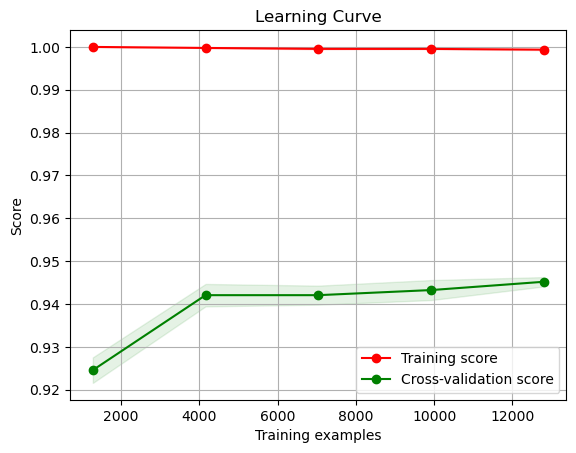

-------------

----> AUC: 0.99
-------------


In [63]:
# random forest
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, train_sizes=None):
    if train_sizes is None:
        train_sizes = np.linspace(0.1, 1.0, 5)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.title("Learning Curve")
    plt.show()

# Ploting the learning curve    
y_true = df_transformed_scaled_to_predict['cluster']
y_pred = df_transformed_scaled_to_predict['cluster_pred']

plot_learning_curve(model_et, df_metrics_plot, y_true)

# Calculating th AUC of each class
y_pred_proba = model_rf.predict_proba(df_metrics_plot)
auc_score = roc_auc_score(y_true, y_pred_proba, multi_class='ovr')
print ('-------------')
print() 
print(f"----> AUC: {auc_score:.2f}")
print ('-------------')
# 3) Plotar ROC
fpr = {}
tpr = {}
roc_auc = {}

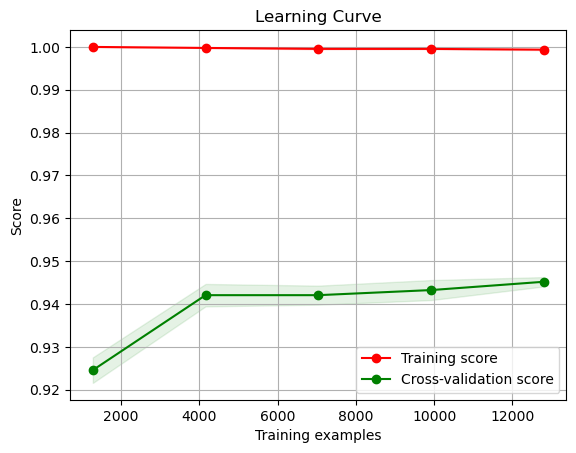

-------------

----> AUC: 0.96
-------------


In [64]:
# decision Trees
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, train_sizes=None):
    if train_sizes is None:
        train_sizes = np.linspace(0.1, 1.0, 5)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.title("Learning Curve")
    plt.show()

# Ploting the learning curve    
y_true = df_transformed_scaled_to_predict['cluster']
y_pred = df_transformed_scaled_to_predict['cluster_pred']

plot_learning_curve(model_et, df_metrics_plot, y_true)

# Calculating th AUC of each class
y_pred_proba = model_dt.predict_proba(df_metrics_plot)
auc_score = roc_auc_score(y_true, y_pred_proba, multi_class='ovr')
print ('-------------')
print() 
print(f"----> AUC: {auc_score:.2f}")
print ('-------------')
# 3) Plotar ROC
fpr = {}
tpr = {}
roc_auc = {}

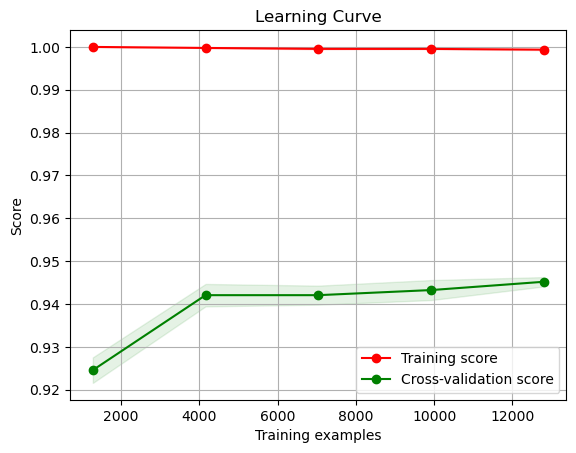

-------------

----> AUC: 0.99
-------------


In [65]:
# Extra Trees
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import learning_curve

# 1) Plotar a curva de aprendizagem
def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, train_sizes=None):
    if train_sizes is None:
        train_sizes = np.linspace(0.1, 1.0, 5)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.title("Learning Curve")
    plt.show()

# Ploting the learning curve    
y_true = df_transformed_scaled_to_predict['cluster']
y_pred = df_transformed_scaled_to_predict['cluster_pred']

plot_learning_curve(model_et, df_metrics_plot, y_true)

# Calculating th AUC of each class
y_pred_proba = model_et.predict_proba(df_metrics_plot)
auc_score = roc_auc_score(y_true, y_pred_proba, multi_class='ovr')
print ('-------------')
print() 
print(f"----> AUC: {auc_score:.2f}")
print ('-------------')
# 3) Plotar ROC
fpr = {}
tpr = {}
roc_auc = {}